In [1]:
import h5py

filename = "C:\\Contents\\Kaggle\\datasets\\train_catvnoncat.h5"
filename_test = "C:\\Contents\\Kaggle\\datasets\\test_catvnoncat.h5"

h5 = h5py.File(filename,'r')
h5t = h5py.File(filename_test,'r')



In [2]:
import numpy as np

X_train = np.array(h5['train_set_x'])
y_train = np.array(h5['train_set_y'])


X_test = np.array(h5t['test_set_x'])
y_test = np.array(h5t['test_set_y'])

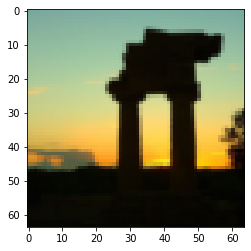

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


plt.imshow(X_train[40])

In [4]:
y_train[40]

0

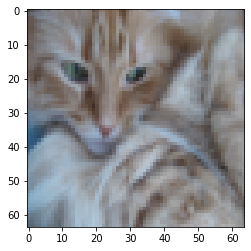

In [5]:

plt.imshow(X_train[2])

In [6]:
y_train[2]

1

In [7]:
X_train[40].shape

(64, 64, 3)

In [8]:
X_train.shape


(209, 64, 64, 3)

In [10]:
X_train[0]

array([[[17, 31, 56],
        [22, 33, 59],
        [25, 35, 62],
        ...,
        [ 1, 28, 57],
        [ 1, 26, 56],
        [ 1, 22, 51]],

       [[25, 36, 62],
        [28, 38, 64],
        [30, 40, 67],
        ...,
        [ 1, 27, 56],
        [ 1, 25, 55],
        [ 2, 21, 51]],

       [[32, 40, 67],
        [34, 42, 69],
        [35, 42, 70],
        ...,
        [ 1, 25, 55],
        [ 0, 24, 54],
        [ 1, 21, 51]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [11]:
X_train = X_train/255.0
X_test = X_test/255.0

In [13]:
input_data_shape = X_train[0].shape
print(input_data_shape)

(64, 64, 3)


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape = input_data_shape, name = 'Input_Layer'))
model.add(Dense(3072, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(384, kernel_initializer='normal', activation = 'relu'))
#model.add(Dense(16, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Flatten)        (None, 12288)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 3072)              37751808  
_________________________________________________________________
dense_10 (Dense)             (None, 384)               1180032   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 385       
Total params: 38,932,225
Trainable params: 38,932,225
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=150,validation_data=(X_test,y_test))

Train on 209 samples, validate on 50 samples
Epoch 1/150
209/209 [==============================] - 9s 43ms/step - loss: 8.2033 - accuracy: 0.5263 - val_loss: 7.9903 - val_accuracy: 0.3400
Epoch 2/150
209/209 [==============================] - 8s 38ms/step - loss: 1.9595 - accuracy: 0.6077 - val_loss: 7.0552 - val_accuracy: 0.3400
Epoch 3/150
209/209 [==============================] - 8s 38ms/step - loss: 1.2651 - accuracy: 0.6364 - val_loss: 0.9409 - val_accuracy: 0.6000
Epoch 4/150
209/209 [==============================] - 8s 38ms/step - loss: 0.7042 - accuracy: 0.7464 - val_loss: 0.5433 - val_accuracy: 0.8000
Epoch 5/150
209/209 [==============================] - 8s 38ms/step - loss: 0.7582 - accuracy: 0.7225 - val_loss: 0.5605 - val_accuracy: 0.7600
Epoch 6/150
209/209 [==============================] - 8s 39ms/step - loss: 2.0114 - accuracy: 0.5694 - val_loss: 0.6211 - val_accuracy: 0.8200
Epoch 7/150
209/209 [==============================] - 8s 38ms/step - loss: 1.0341 - accura

209/209 [==============================] - 8s 38ms/step - loss: 0.2190 - accuracy: 0.8995 - val_loss: 1.1386 - val_accuracy: 0.6400
Epoch 58/150
209/209 [==============================] - 8s 38ms/step - loss: 0.0637 - accuracy: 0.9809 - val_loss: 1.4168 - val_accuracy: 0.7000
Epoch 59/150
209/209 [==============================] - 8s 38ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 1.4307 - val_accuracy: 0.7800
Epoch 60/150
209/209 [==============================] - 8s 38ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 1.5742 - val_accuracy: 0.7600
Epoch 61/150
209/209 [==============================] - 8s 38ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 1.4956 - val_accuracy: 0.7800
Epoch 62/150
209/209 [==============================] - 8s 38ms/step - loss: 0.0448 - accuracy: 0.9809 - val_loss: 1.5489 - val_accuracy: 0.7800
Epoch 63/150
209/209 [==============================] - 8s 38ms/step - loss: 0.0448 - accuracy: 0.9809 - val_loss: 2.0131 - val_accuracy: 0.660

209/209 [==============================] - 8s 37ms/step - loss: 7.0962e-05 - accuracy: 1.0000 - val_loss: 2.7100 - val_accuracy: 0.7800
Epoch 113/150
209/209 [==============================] - 8s 38ms/step - loss: 6.3223e-05 - accuracy: 1.0000 - val_loss: 2.7230 - val_accuracy: 0.7800
Epoch 114/150
209/209 [==============================] - 8s 37ms/step - loss: 6.2006e-05 - accuracy: 1.0000 - val_loss: 2.7402 - val_accuracy: 0.7800
Epoch 115/150
209/209 [==============================] - 8s 38ms/step - loss: 5.9246e-05 - accuracy: 1.0000 - val_loss: 2.7484 - val_accuracy: 0.7800
Epoch 116/150
209/209 [==============================] - 8s 38ms/step - loss: 5.8827e-05 - accuracy: 1.0000 - val_loss: 2.7672 - val_accuracy: 0.7800
Epoch 117/150
209/209 [==============================] - 8s 38ms/step - loss: 5.6879e-05 - accuracy: 1.0000 - val_loss: 2.7850 - val_accuracy: 0.7800
Epoch 118/150
209/209 [==============================] - 8s 37ms/step - loss: 5.3679e-05 - accuracy: 1.0000 - val_

In [19]:
from keras.constraints import maxnorm

model = Sequential()
model.add(Flatten(input_shape = input_data_shape, name = 'Input_Layer'))
model.add(Dropout(0.2))
model.add(Dense(3072, kernel_initializer='normal', activation = 'relu', kernel_constraint=maxnorm(3)))
model.add(Dense(256, kernel_initializer='normal', activation = 'relu'))
#model.add(Dense(16, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Flatten)        (None, 12288)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12288)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 3072)              37751808  
_________________________________________________________________
dense_16 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 257       
Total params: 38,538,753
Trainable params: 38,538,753
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size=10, epochs=80,validation_data=(X_test,y_test))

Train on 209 samples, validate on 50 samples
Epoch 1/80
209/209 [==============================] - 16s 78ms/step - loss: 4.9639 - accuracy: 0.5311 - val_loss: 0.7072 - val_accuracy: 0.6800
Epoch 2/80
209/209 [==============================] - 15s 73ms/step - loss: 3.3329 - accuracy: 0.5837 - val_loss: 4.7348 - val_accuracy: 0.3400
Epoch 3/80
209/209 [==============================] - 15s 73ms/step - loss: 2.0496 - accuracy: 0.5981 - val_loss: 1.2381 - val_accuracy: 0.4000
Epoch 4/80
209/209 [==============================] - 15s 73ms/step - loss: 0.8876 - accuracy: 0.6890 - val_loss: 1.1870 - val_accuracy: 0.4200
Epoch 5/80
209/209 [==============================] - 15s 72ms/step - loss: 1.0991 - accuracy: 0.6124 - val_loss: 3.0513 - val_accuracy: 0.3400
Epoch 6/80
209/209 [==============================] - 15s 73ms/step - loss: 1.4601 - accuracy: 0.5694 - val_loss: 0.5800 - val_accuracy: 0.7800
Epoch 7/80
209/209 [==============================] - 15s 73ms/step - loss: 0.6866 - accura

209/209 [==============================] - 15s 73ms/step - loss: 0.2326 - accuracy: 0.8852 - val_loss: 1.0640 - val_accuracy: 0.7600
Epoch 58/80
209/209 [==============================] - 15s 73ms/step - loss: 0.2949 - accuracy: 0.8900 - val_loss: 2.1890 - val_accuracy: 0.4400
Epoch 59/80
209/209 [==============================] - 15s 73ms/step - loss: 0.1386 - accuracy: 0.9426 - val_loss: 0.9831 - val_accuracy: 0.7600
Epoch 60/80
209/209 [==============================] - 15s 71ms/step - loss: 0.0512 - accuracy: 0.9856 - val_loss: 1.2466 - val_accuracy: 0.7200
Epoch 61/80
209/209 [==============================] - 15s 73ms/step - loss: 0.0341 - accuracy: 0.9904 - val_loss: 1.2738 - val_accuracy: 0.7800
Epoch 62/80
209/209 [==============================] - 15s 72ms/step - loss: 0.0407 - accuracy: 0.9952 - val_loss: 1.4153 - val_accuracy: 0.7400
Epoch 63/80
209/209 [==============================] - 15s 72ms/step - loss: 0.0370 - accuracy: 0.9856 - val_loss: 2.7577 - val_accuracy: 0.50

In [21]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


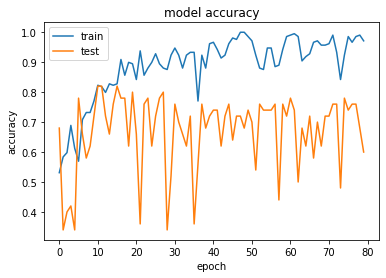

In [23]:
#Accuracy plot 
plt.plot(history.history[  'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


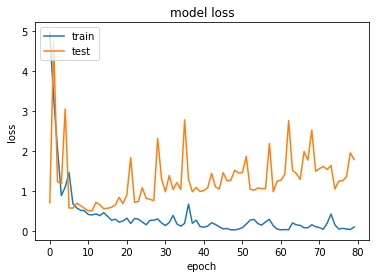

In [24]:
##Loss plot 
plt.plot(history.history[  'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


In [25]:

model = Sequential()
model.add(Flatten(input_shape = input_data_shape, name = 'Input_Layer'))
model.add(Dense(3072, kernel_initializer='normal', activation = 'relu'))
#model.add(Dense(384, kernel_initializer='normal', activation = 'relu'))
#model.add(Dense(16, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Flatten)        (None, 12288)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 3072)              37751808  
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 3073      
Total params: 37,754,881
Trainable params: 37,754,881
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size=10, epochs=60,validation_data=(X_test,y_test))

Train on 209 samples, validate on 50 samples
Epoch 1/60
209/209 [==============================] - 8s 40ms/step - loss: 17.7722 - accuracy: 0.5550 - val_loss: 5.1637 - val_accuracy: 0.3400
Epoch 2/60
209/209 [==============================] - 8s 37ms/step - loss: 2.6268 - accuracy: 0.6220 - val_loss: 2.0344 - val_accuracy: 0.7400
Epoch 3/60
209/209 [==============================] - 8s 36ms/step - loss: 2.1420 - accuracy: 0.6029 - val_loss: 1.1585 - val_accuracy: 0.7400
Epoch 4/60
209/209 [==============================] - 8s 36ms/step - loss: 0.9196 - accuracy: 0.7368 - val_loss: 0.8969 - val_accuracy: 0.7400
Epoch 5/60
209/209 [==============================] - 8s 36ms/step - loss: 0.8961 - accuracy: 0.7990 - val_loss: 1.0255 - val_accuracy: 0.7600
Epoch 6/60
209/209 [==============================] - 8s 36ms/step - loss: 1.3197 - accuracy: 0.7464 - val_loss: 1.0946 - val_accuracy: 0.8000
Epoch 7/60
209/209 [==============================] - 8s 36ms/step - loss: 0.8315 - accuracy: 0.

209/209 [==============================] - 8s 36ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.7737 - val_accuracy: 0.6400
Epoch 58/60
209/209 [==============================] - 8s 36ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 1.6836 - val_accuracy: 0.7200
Epoch 59/60
209/209 [==============================] - 8s 36ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 1.5011 - val_accuracy: 0.7400
Epoch 60/60
209/209 [==============================] - 8s 36ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 1.6926 - val_accuracy: 0.6800


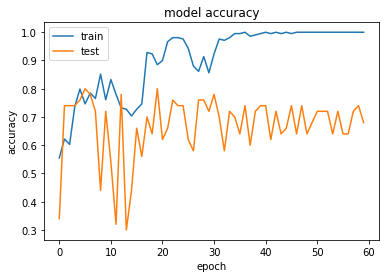

In [27]:
#Accuracy plot 
plt.plot(history.history[  'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()
